<a href="https://colab.research.google.com/github/spencer990330/work/blob/master/Functional_Validation_application_to_job_Market_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing pandas package to read csv file
import pandas as pd
# Importing regular expression module for cleaning the text data 
import re
# Importing matplotlib and seaborn packages for data visualization and data exploration
from matplotlib import pyplot as plt
import seaborn as sns
# Standard setting for all plots with figure size of 50x25
sns.set(rc={'figure.figsize':(50,25)})
# Importing natural language processing package to convert the text into tokens for analysis
from nltk.tokenize import word_tokenize
# To display 40000 rows in the output, hence all the rows of the pandas dataframe column will be diplayed
pd.options.display.max_rows = 40000
import random
import nltk
from nltk.tokenize import word_tokenize

import re

import math


In [ ]:
data = pd.read_csv('/content/resume_data.csv')
# Check to test the data quality. If all the source data has been read correctly to pandas dataframe, From data frame observation we infer that there is unwanted text in work_experience, Educations, skills, Links, Certificates and Additional Infomration columns. We need to clean the text in these columns. 
data.head()

,Resume_title,City,State,Description,work_experiences,Educations,Skills,Links,Certificates,Additional Information
0,Java Developer,Tirur,Kerala,"To prove myself dedicated, worthy and energeti...","{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Bachelor of C...","['Java (Less than 1 year)', ' Jsp (Less than 1...",['https://www.linkedin.com/in/mohamed-rihan-k-...,"{0: [{'c_title:': 'Java Developer'}, {'c_durat...",\nTechnical Expertise \n• Operating Systems: W...
1,Software Developer,Bengaluru,Karnataka,Working as Software Developer at IngroInfo Sof...,"{0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...",{0: [{'e_title:': 'MCA in Master of Computer A...,"['Programming Languages: Core Java', ' J2EE \n...","['http://github.com/NK-PATEL/Train_Project', '...",{},NONE
2,Java developer,Pune,Maharashtra,Looking for a challenging career which demands...,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': ""Bachelor's in Electrical En...","['ECLIPSE (1 year)', ' HIBERNATE', ' SPRING (L...",[],{},"\nTECHNICAL SKILLS \n \nFrameworks: Spring, Sp..."
3,Seeking innovative and challenging career assi...,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...","{0: [{'e_title:': 'BE in Computer'}, {'e_schoo...","['GIT', ' Angular 7', ' MAVEN', ' Java', ' Jen...",[],{},NONE
4,NONE,Pune,Maharashtra,NONE,"{0: [{'wtitle:': 'Java Developer'}, {'wcompany...",{0: [{'e_title:': 'Bachelor of Engineering in ...,['Project: HR Payroll Systems Role: Java Devel...,[],{},NONE


In [ ]:
# Checking the statistics of the data. From our output we can observe that we have 14800 rows 
data.describe()
# Check for missing values. From our observation, we have 2 missing values in our data in columns Education, Links, Skills, Certificates and Additional Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14804 entries, 0 to 14803
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_title            14800 non-null  object
 1   City                    14800 non-null  object
 2   State                   14800 non-null  object
 3   Description             14800 non-null  object
 4   work_experiences        14800 non-null  object
 5   Educations              14798 non-null  object
 6   Skills                  14798 non-null  object
 7   Links                   14798 non-null  object
 8   Certificates            14798 non-null  object
 9   Additional Information  14798 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


**Data Cleaning of the columns work_experience, Educations, skills, Links, Certificates and Additional Infomration by removing unwanted text **

In [ ]:
 # Cleaning the Links column by removing the strings [] and quotes ('') to display only the text
data['Links'] = data['Links'].str.replace('[', '')
data['Links'] = data['Links'].str.replace(']', '')
data['Links'] = data['Links'].str.replace("'", "")
# Removed square brackets [] and quotes '' from the links column to contain only the text
data['Links']

0        https://www.linkedin.com/in/mohamed-rihan-k-58...
1        http://github.com/NK-PATEL/Train_Project, http...
2                                                         
3                                                         
4                                                         
5                                                         
6        https://www.linkedin.com/in/rakhi-bishi-a01324...
7                                                         
8                                                         
9                                                         
10       http://app.fantasticlife.ca/, http://app.fanta...
11       https://www.linkedin.com/in/faiz-mateen-753824...
12                                                        
13       https://www.linkedin.com/in/rimjhim-srivastava...
14                                                        
15                                                        
16                                                      

In [ ]:
data['work_experiences'] = data['work_experiences']
data['work_experiences']

0        {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
1        {0: [{'wtitle:': 'JAVA DEVELOPER'}, {'wcompany...
2        {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
3        {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
4        {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
5        {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
6        {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
7        {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
8        {0: [{'wtitle:': 'java developer'}, {'wcompany...
9        {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
10       {0: [{'wtitle:': 'Java developer'}, {'wcompany...
11       {0: [{'wtitle:': 'Java developer'}, {'wcompany...
12       {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
13       {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
14       {0: [{'wtitle:': 'Java Developer'}, {'wcompany...
15       {0: [{'wtitle:': 'java developer'}, {'wcompany...
16       {0: [{'wtitle:': 'Software developer'}, {'wcom.

Checking the distribution of application state wise. From the distribution we can infer that maximum number of applications have been submitted from Maharashtra followed by Karnataka. Also we can infer that data is not normally distributed.

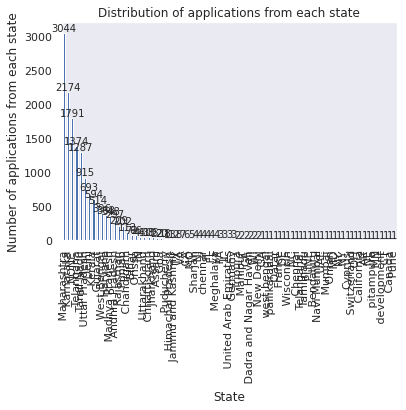

In [ ]:
# Bar graph to display the number of applications from each state
ax = data['State'].value_counts().plot(kind = 'bar')
# Customization to ensure that we do not have grid lines in the plot
ax.grid(False)
# Display the title of the plot
plt.title('Distribution of applications from each state')
# Assign the label to X-axis
plt.xlabel('State')
# Assign the label to Y-axis
plt.ylabel('Number of applications from each state')
# For loop to display the count value of each bar graph
for p in ax.patches:
     ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,5), textcoords = 'offset points')
plt.show()


In [12]:
df = pd.read_csv("/content/sample_data/job position.csv")
df.head(2)
print("Data Shape:", df.shape)

# Remove the urls first - Anything that has .com, .co.uk or www. is a url!
def remove_urls(s):
    s = re.sub('[^\s]*.com[^\s]*', "", s)
    s = re.sub('[^\s]*www.[^\s]*', "", s)
    s = re.sub('[^\s]*.co.uk[^\s]*', "", s)
    return s

df['Clean_Full_Descriptions'] = df['FullDescription'].map(remove_urls)
# Remove the star_words
def remove_star_words(s):
    return re.sub('[^\s]*[\*]+[^\s]*', "", s)

df['Clean_Full_Descriptions'] = df['Clean_Full_Descriptions'].map(remove_star_words)

def remove_nums(s):
    return re.sub('[^\s]*[0-9]+[^\s]*', "", s)

df['Clean_Full_Descriptions'] = df['Clean_Full_Descriptions'].map(remove_nums)

# Remove the punctuations
from string import punctuation

def remove_punctuation(s):
    global punctuation
    for p in punctuation:
        s = s.replace(p, '')
    return s

df['Clean_Full_Descriptions'] = df['Clean_Full_Descriptions'].map(remove_punctuation)

# Convert to lower case
df['Clean_Full_Descriptions'] = df['Clean_Full_Descriptions'].map(lambda x: x.lower())

corpus = " ".join(df['Clean_Full_Descriptions'].tolist())

# This is the NLTK function that breaks a string down to its tokens
tokens = word_tokenize(corpus)

# Get the parts of speech tag for all words
answer = nltk.pos_tag(tokens)
answer_pos = [a[1] for a in answer]

df.head(5)
df.loc[:,"Clean_Full_Descriptions"].head(5)

Data Shape: (244768, 12)


NameError: ignored

In [13]:
df.head(3)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,Clean_Full_Descriptions
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk,engineering systems analyst dorking surrey sal...
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk,stress engineer glasgow salary to we re curr...
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk,mathematical modeller simulation analyst ope...


In [ ]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
nltk.download('averaged_perceptron_tagger')

en_stopwords = stopwords.words('english')

# define a function to remove stopwords from descriptions
def remove_stopwords(s):
    global en_stopwords
    s = word_tokenize(s)
    s = " ".join([w for w in s if w not in en_stopwords])
    return s

# Create a new column of descriptions with no stopwords
df['Clean_Full_Descriptions_no_stop'] = df['Clean_Full_Descriptions'].map(remove_stopwords)

# make a corpus of all the words in the job description
corpus = " ".join(df['Clean_Full_Descriptions_no_stop'].tolist())

# This is the NLTK function that breaks a string down to its tokens
tokens = word_tokenize(corpus)

answer = nltk.pos_tag(tokens)
answer_pos = [a[1] for a in answer]

all_pos = pd.Series(answer_pos)
all_pos.value_counts().head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
df['Clean_Full_Descriptions_no_stop'].head(5)

NameError: ignored

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lmtzr = WordNetLemmatizer()

# prepare corpus from the descriptions that dont have stopwords
 
for i in range(len(df)):
 
  corpus = df['Clean_Full_Descriptions_no_stop'][i]

#tokenize words
  tokenized_corpus = nltk.word_tokenize(corpus)

# lemmatize these tokens
  lemmatized_tokens = [lmtzr.lemmatize(token) for token in tokenized_corpus]

# word frequencies for the lemmatized tokens
  fd= nltk.FreqDist(lemmatized_tokens)
  top_words = []
  words=pd.Series([])
  for key, value in fd.items():
    top_words.append((key, value))
    words[i]=top_words




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [ ]:
words



NameError: ignored